# Data Science and Machine Learning (DSE 302) - Project 7: Mushroom Classification

## Submitted by Ayush Dabra (19069), Department of Data Science and Engineering

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Reading Data

In [2]:
df=pd.read_csv('../input/dse302-dsml/project7/mushroom_trn_data.csv')
df_labels=pd.read_csv('../input/dse302-dsml/project7/mushroom_trn_class_labels.csv', header=None)
df_labels.columns=['row', 'label']
df = df.join(df_labels.label)
df.head()

df_test=pd.read_csv('../input/dse302-dsml/project7/mushroom_tst_data.csv')

In [3]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,label
0,f,y,g,t,n,f,c,b,n,t,...,p,w,p,w,o,p,n,y,d,e
1,f,f,e,t,n,f,c,b,p,t,...,g,g,p,w,o,p,k,v,d,e
2,f,s,g,f,n,f,w,b,h,t,...,w,w,p,w,o,e,k,a,g,e
3,x,s,w,f,c,f,w,n,u,e,...,w,w,p,w,o,p,n,v,d,p
4,x,s,n,f,s,f,c,n,b,t,...,p,p,p,w,o,e,w,v,p,p


# Exploratory Data Analysis (EDA)

In [4]:
df.shape

(7311, 23)

In [5]:
df.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,label
count,7311,7311,7311,7311,7311,7311,7311,7311,7311,7311,...,7311,7311,7311,7311,7311,7311,7311,7311,7311,7311
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3287,2899,2039,4268,3177,7129,6124,5056,1557,4156,...,4024,3968,7311,7139,6730,3563,2157,3639,2839,3787


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7311 entries, 0 to 7310
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 7311 non-null   object
 1   cap-surface               7311 non-null   object
 2   cap-color                 7311 non-null   object
 3   bruises                   7311 non-null   object
 4   odor                      7311 non-null   object
 5   gill-attachment           7311 non-null   object
 6   gill-spacing              7311 non-null   object
 7   gill-size                 7311 non-null   object
 8   gill-color                7311 non-null   object
 9   stalk-shape               7311 non-null   object
 10  stalk-root                7311 non-null   object
 11  stalk-surface-above-ring  7311 non-null   object
 12  stalk-surface-below-ring  7311 non-null   object
 13  stalk-color-above-ring    7311 non-null   object
 14  stalk-color-below-ring  

### Finding null values in columns

In [7]:
df.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
label                       0
dtype: int64

In [8]:
df.isnull().values.any()

False

### Analysis of the target (label) Feature

In [9]:
df['label'].unique()

array(['e', 'p'], dtype=object)

In [10]:
df['label'].value_counts()

e    3787
p    3524
Name: label, dtype: int64

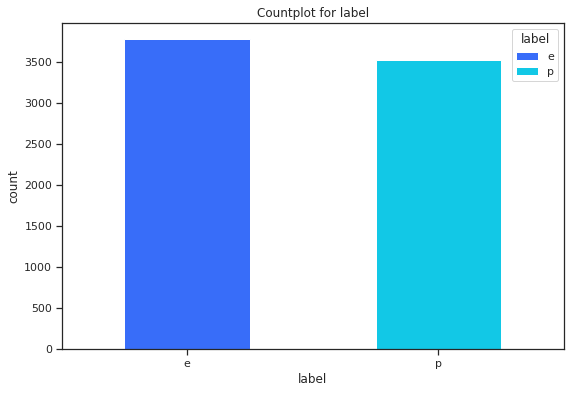

In [11]:
label = pd.crosstab(df['label'], df['label'])
sns.set_theme(style="ticks", palette="rainbow")
label.plot(kind='bar', rot=0, stacked=True, figsize=(9, 6), title='Countplot for label')
plt.xlabel('label')
plt.ylabel('count')
plt.savefig("count_label.png", format='png', dpi=300)
plt.show()

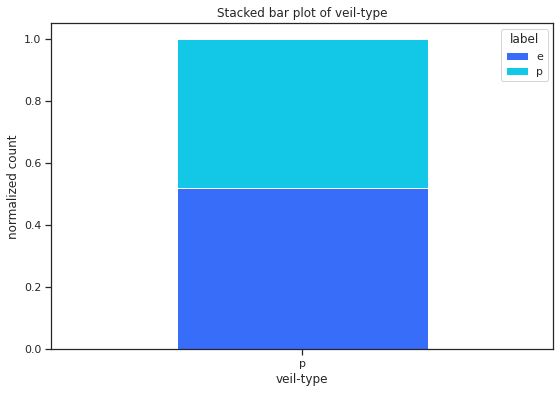

In [12]:
veil_type = pd.crosstab(df['veil-type'], df['label'])
veil_type_norm = veil_type.div(veil_type.sum(axis=1), axis=0)
sns.set_theme(style="ticks", palette="rainbow")
veil_type_norm.plot(kind='bar', rot=0, stacked=True, figsize=(9, 6), title='Stacked bar plot of veil-type')
plt.xlabel('veil-type')
plt.ylabel('normalized count')
plt.savefig("veil_type.png", format='png', dpi=300)
plt.show()

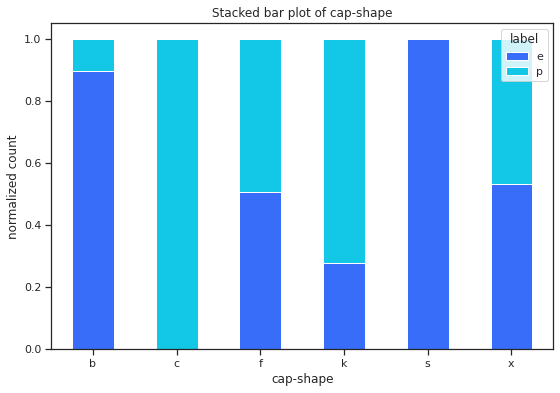

In [13]:
cap_shape = pd.crosstab(df['cap-shape'], df['label'])
cap_shape_norm = cap_shape.div(cap_shape.sum(axis=1), axis=0)
cap_shape_norm.plot(kind='bar', rot=0, stacked=True, figsize=(9, 6), title='Stacked bar plot of cap-shape')
plt.xlabel('cap-shape')
plt.ylabel('normalized count')
plt.savefig("cap_shape.png", format='png', dpi=300)
plt.show()

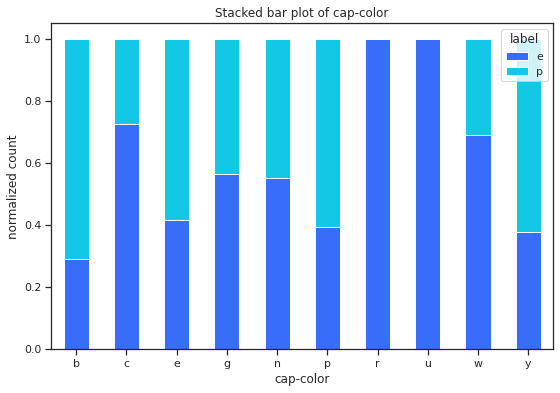

In [14]:
cap_color = pd.crosstab(df['cap-color'], df['label'])
cap_color_norm = cap_color.div(cap_color.sum(axis=1), axis=0)
cap_color_norm.plot(kind='bar', rot=0, stacked=True, figsize=(9, 6), title='Stacked bar plot of cap-color')
plt.xlabel('cap-color')
plt.ylabel('normalized count')
plt.savefig("cap_color.png", format='png', dpi=300)
plt.show()

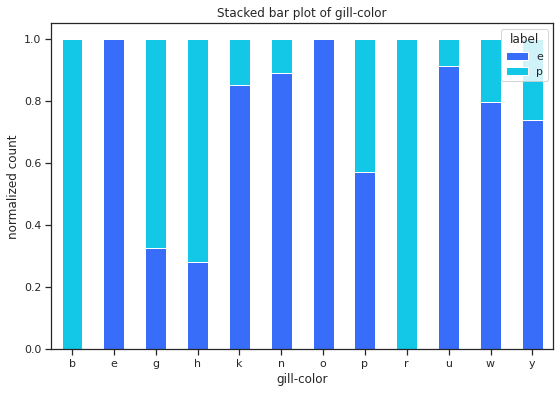

In [15]:
gill_color = pd.crosstab(df['gill-color'], df['label'])
gill_color_norm = gill_color.div(gill_color.sum(axis=1), axis=0)
gill_color_norm.plot(kind='bar', rot=0, stacked=True, figsize=(9, 6), title='Stacked bar plot of gill-color')
plt.xlabel('gill-color')
plt.ylabel('normalized count')
plt.savefig("gill_color.png", format='png', dpi=300)
plt.show()

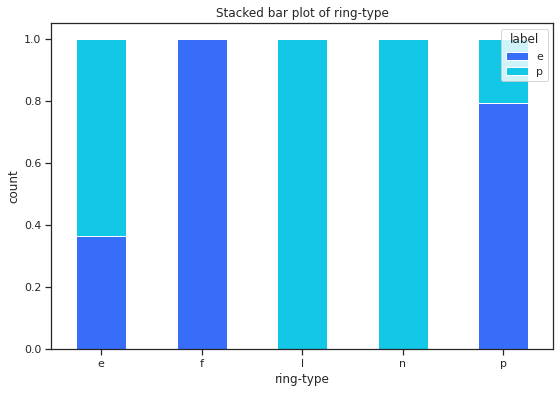

In [16]:
ring_type = pd.crosstab(df['ring-type'], df['label'])
ring_type_norm = ring_type.div(ring_type.sum(axis=1), axis=0)
ring_type_norm.plot(kind='bar', rot=0, stacked=True, figsize=(9, 6), title='Stacked bar plot of ring-type')
plt.xlabel('ring-type')
plt.ylabel('count')
plt.savefig("ring_type.png", format='png', dpi=300)
plt.show()

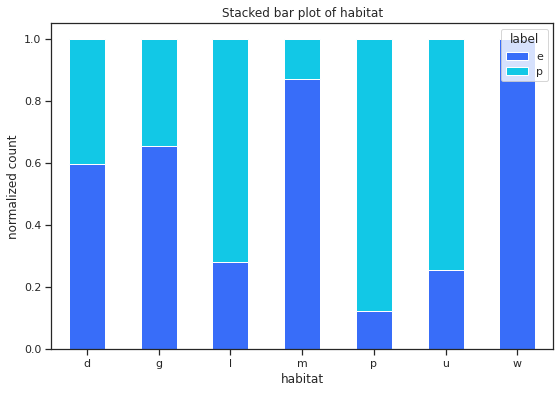

In [17]:
habitat = pd.crosstab(df['habitat'], df['label'])
habitat_norm = habitat.div(habitat.sum(axis=1), axis=0)
habitat_norm.plot(kind='bar', rot=0, stacked=True, figsize=(9, 6), title='Stacked bar plot of habitat')
plt.xlabel('habitat')
plt.ylabel('normalized count')
plt.savefig("habitat.png", format='png', dpi=300)
plt.show()

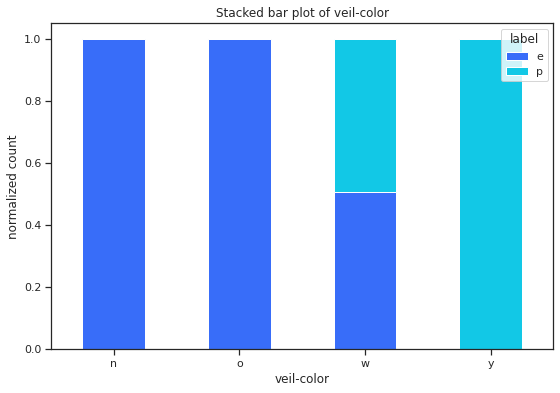

In [18]:
veil_color = pd.crosstab(df['veil-color'], df['label'])
veil_color_norm = veil_color.div(veil_color.sum(axis=1), axis=0)
veil_color_norm.plot(kind='bar',rot=0, stacked=True, figsize=(9, 6), title='Stacked bar plot of veil-color')
plt.xlabel('veil-color')
plt.ylabel('normalized count')
plt.legend(title='label', loc='upper right')
plt.savefig("veil_color.png", format='png', dpi=300)
plt.show()

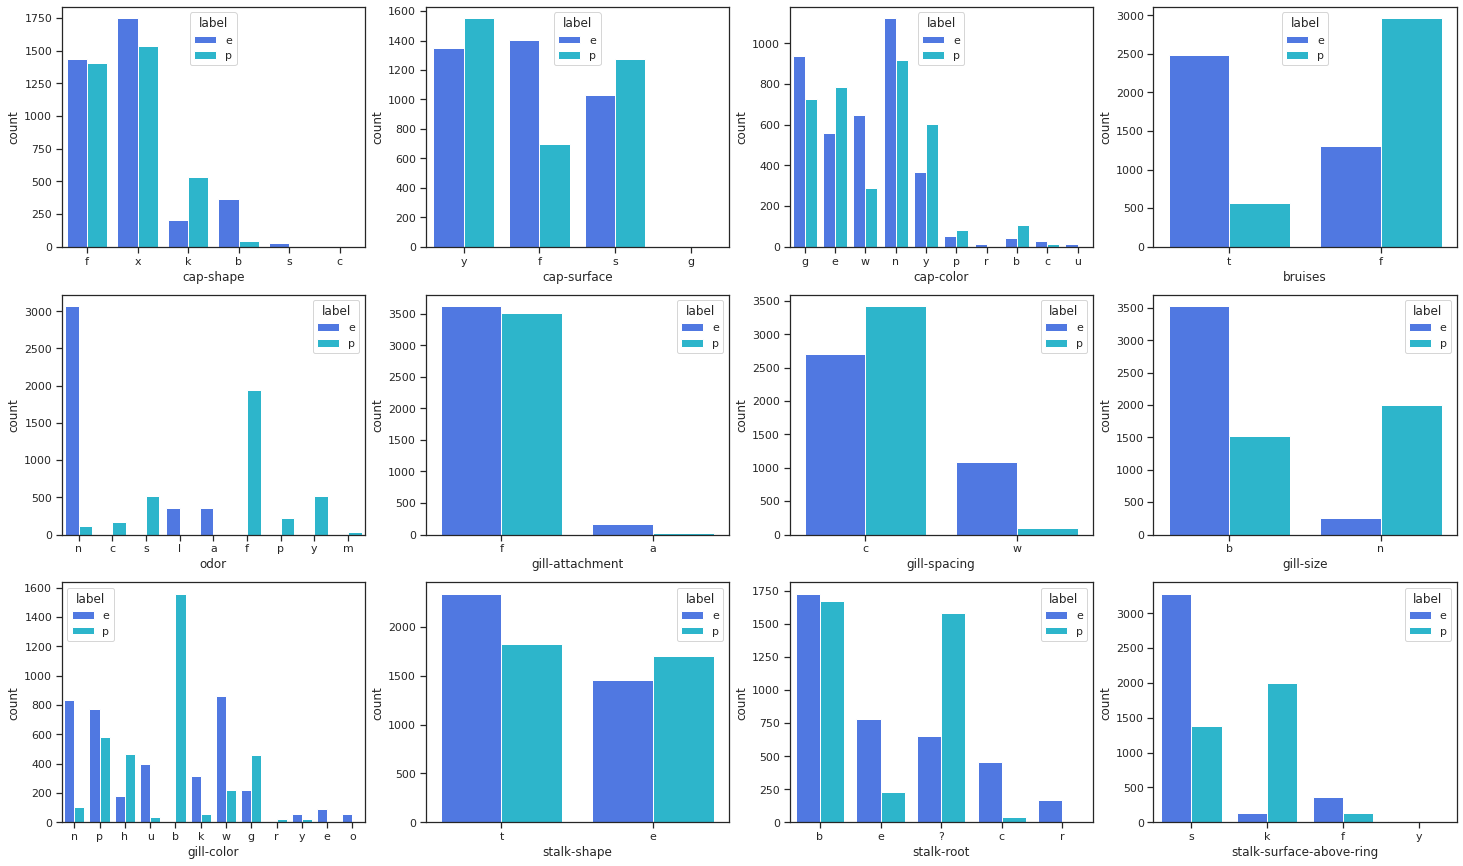

In [19]:
plt.figure(figsize=(25,15))
for i in list(enumerate(df.columns[:12])):
    plt.subplot(3,4,i[0]+1)
    sns.countplot(i[1],hue='label',data=df)
plt.savefig("count_plots_combined.png", format='png', dpi=300)
plt.show()

# Data Manipulation & Preparation

We'll use LabelEncoder to transform the categorical data to ordinal. Each value in a column is converted to a number by LabelEncoder. So, before we use this method, we'll have to alter the type to 'category.'


In [20]:
df = df.astype('category')
df.dtypes

cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
label                       category
dtype: object

In [21]:
labelencoder=LabelEncoder()

for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])
    
for column in df_test.columns:
    df_test[column] = labelencoder.fit_transform(df_test[column])

#### Correlation Matrix

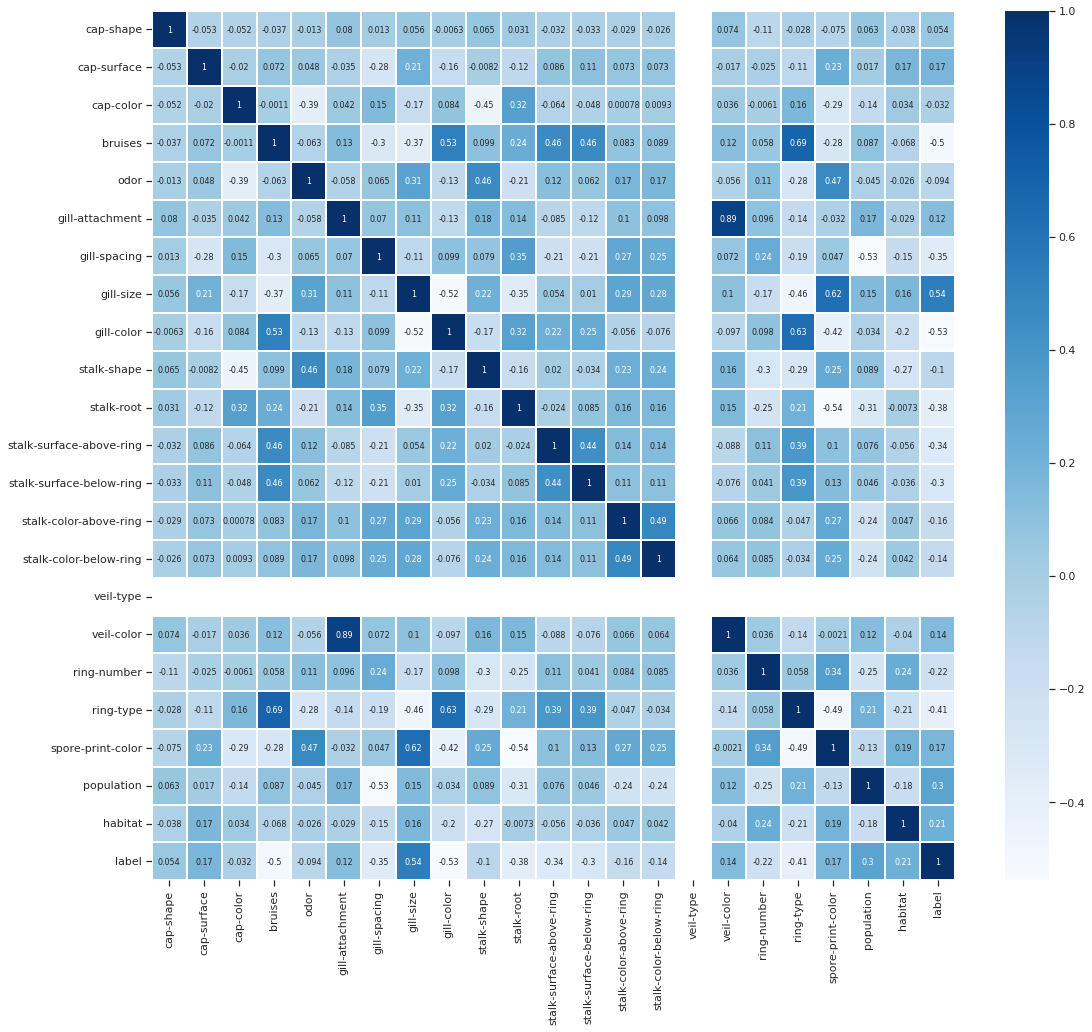

In [22]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(),linewidths=.08,cmap="Blues", annot=True, annot_kws={"size": 8})
plt.yticks(rotation=0);
plt.savefig("corr.png", format='png', dpi=300, bbox_inches='tight')

### Splitting Dataset

In [23]:
X = df.iloc[:,0:22] # Features
y = df.iloc[:,22] # Target variable

# 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 

In [24]:
# Dataframe for storing scores of different models
scores = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])

# Models

## 1. Decision Tree Classifier

In [25]:
def decision_tree_classifier(X_train, Y_train, X_val, Y_val, tune, scores):
    if tune == 'n':
        print('Without Hyper-Parameter Tuning\n\n')
        dtc_pipe = Pipeline([
            ('dtc', DecisionTreeClassifier()
        ])
        dtc_pipe.fit(X_train, Y_train)
        pred_train = dtc_pipe.predict(X_train)
        pred_val = dtc_pipe.predict(X_val)

        train_acc = metrics.accuracy_score(Y_train, pred_train)
        val_acc = metrics.accuracy_score(Y_val, pred_val)
        val_rec = metrics.recall_score(Y_val, pred_val)
        val_prec = metrics.precision_score(Y_val, pred_val)
        val_f1 = metrics.f1_score(Y_val, pred_val)
        
        dtc_acc = {
            'Model': 'Decision Tree',
            'Accuracy': val_acc,
            'Precision': val_prec,
            'Recall': val_rec,
            'F1': val_f1
        }
        
        scores = scores.append(dtc_acc, ignore_index = True)

        print('Accuracy on train set:', train_acc, '\n')
        print('Accuracy on validation set:', val_acc, '\n')
        print('Precision on validation set:', val_prec, '\n')
        print('Recall on validation set:', val_rec, '\n')
        print('F1-score on validation set:', val_f1, '\n')
        print('Classification Report (for validation set):\n\n', classification_report(Y_val, pred_val))

        # visualize confusion matrix
        plt.subplots(figsize=(8,7))
        sns.heatmap(confusion_matrix(Y_val, pred_val), annot=True, cmap="YlGnBu", linewidths=1.0)
        plt.title('Confusion Matrix on Validation Data\n', fontsize=12)
        plt.show()

        return dtc_pipe, scores
    
    elif tune == 'y':
        print('With Hyper-Parameter Tuning\n\n')
        dtc_pipe = Pipeline([
            ('dtc', DecisionTreeClassifier())
        ])
        params = {
            'dtc__criterion':['gini', 'entropy'], 
            'dtc__max_features':['auto', 'sqrt', 'log2'],
            'dtc__max_depth':[10,40,45,60],
        }
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)
        grid = GridSearchCV(
            dtc_pipe,
            param_grid=params,
            scoring='f1_macro',
            cv=cv,
            verbose=1,
            n_jobs=-1
        )
        
        grid.fit(X_train, y_train)
        print('Best parameters: ', grid.best_params_, '\n')
        
        pred_train = grid.predict(X_train)
        pred_val = grid.predict(X_val)
        
        train_acc = metrics.accuracy_score(Y_train, pred_train)
        val_acc = metrics.accuracy_score(Y_val, pred_val)
        val_rec = metrics.recall_score(Y_val, pred_val)
        val_prec = metrics.precision_score(Y_val, pred_val)
        val_f1 = metrics.f1_score(Y_val, pred_val)

        dtc_acc = {
            'Model': 'Decision Tree (Tuned)',
            'Accuracy': val_acc,
            'Precision': val_prec,
            'Recall': val_rec,
            'F1': val_f1
        }
        scores = scores.append(dtc_acc, ignore_index = True)
        
        print('Accuracy on train set:', train_acc,'\n')
        print('Accuracy on validation set:', val_acc, '\n')
        print('Precision on validation set:', val_prec, '\n')
        print('Recall on validation set:', val_rec, '\n')
        print('F1-score on validation set:', val_f1, '\n')
        print('Classification Report (for validation set):\n\n', classification_report(Y_val, pred_val))

        # visualize confusion matrix
        plt.subplots(figsize=(8,7))
        sns.heatmap(confusion_matrix(Y_val, pred_val), annot=True, cmap="YlGnBu", linewidths=1.0)
        plt.title('Confusion Matrix on Validation Data\n', fontsize=12)
        plt.show()
        
        return grid, scores
    
    else:
        print('Wrong Input!')

Without Hyper-Parameter Tuning


Accuracy on train set: 0.9413474692202463 

Accuracy on validation set: 0.9336978810663021 

Precision on validation set: 0.9175824175824175 

Recall on validation set: 0.9475177304964539 

F1-score on validation set: 0.9323098394975576 

Classification Report (for validation set):

               precision    recall  f1-score   support

           0       0.95      0.92      0.94       758
           1       0.92      0.95      0.93       705

    accuracy                           0.93      1463
   macro avg       0.93      0.93      0.93      1463
weighted avg       0.93      0.93      0.93      1463



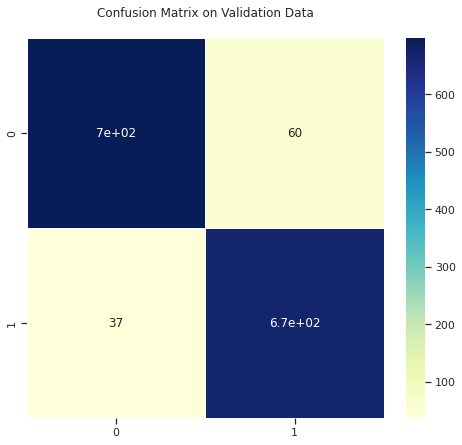

In [26]:
# Without Hyper-Parameter Tuning
dtc_pipe, scores = decision_tree_classifier(X_train=X_train, Y_train=y_train, X_val=X_val, Y_val=y_val, tune='n', scores=scores)

With Hyper-Parameter Tuning


Fitting 50 folds for each of 24 candidates, totalling 1200 fits
Best parameters:  {'dtc__criterion': 'gini', 'dtc__max_depth': 60, 'dtc__max_features': 'log2'} 

Accuracy on train set: 1.0 

Accuracy on validation set: 1.0 

Precision on validation set: 1.0 

Recall on validation set: 1.0 

F1-score on validation set: 1.0 

Classification Report (for validation set):

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       758
           1       1.00      1.00      1.00       705

    accuracy                           1.00      1463
   macro avg       1.00      1.00      1.00      1463
weighted avg       1.00      1.00      1.00      1463



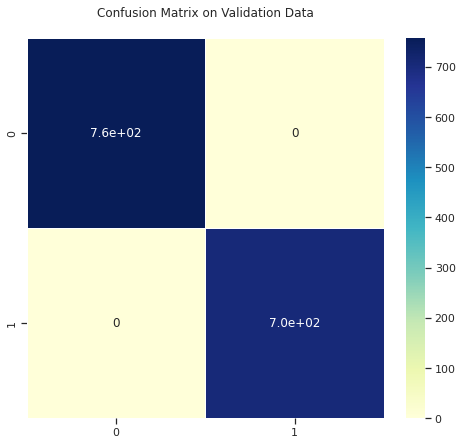

In [27]:
# With Hyper-Parameter Tuning
dtc_grid_tune, scores = decision_tree_classifier(X_train=X_train, Y_train=y_train, X_val=X_val, Y_val=y_val, tune='y', scores=scores)

## 2. Logistic Regression

In [28]:
def logreg_classifier(X_train, Y_train, X_val, Y_val, tune, scores=scores):
    if tune == 'n':
        print('Without Hyper-Parameter Tuning\n\n')
        log_reg_pipe = Pipeline([
            ('log_reg', LogisticRegression())
        ])
        log_reg_pipe.fit(X_train, Y_train)
        pred_train = log_reg_pipe.predict(X_train)
        pred_val = log_reg_pipe.predict(X_val)

        train_acc = metrics.accuracy_score(Y_train, pred_train)
        val_acc = metrics.accuracy_score(Y_val, pred_val)
        val_rec = metrics.recall_score(Y_val, pred_val)
        val_prec = metrics.precision_score(Y_val, pred_val)
        val_f1 = metrics.f1_score(Y_val, pred_val)
        
        logreg_acc = {
            'Model': 'Logistic Regression',
            'Accuracy': val_acc,
            'Precision': val_prec,
            'Recall': val_rec,
            'F1': val_f1
        }
        scores = scores.append(logreg_acc, ignore_index = True)
        
        print('Accuracy on train set:', train_acc,'\n')
        print('Accuracy on validation set:', val_acc, '\n')
        print('Precision on validation set:', val_prec, '\n')
        print('Recall on validation set:', val_rec, '\n')
        print('F1-score on validation set:', val_f1, '\n')
        print('Classification Report (for validation set):\n\n', classification_report(Y_val, pred_val))

        # visualize confusion matrix
        plt.subplots(figsize=(8,7))
        sns.heatmap(confusion_matrix(Y_val, pred_val), annot=True, cmap="YlGnBu", linewidths=1.0)
        plt.title('Confusion Matrix on Validation Data\n', fontsize=12)
        plt.show()

        return log_reg_pipe, scores
    
    elif tune == 'y':
        print('With Hyper-Parameter Tuning\n\n')
        log_reg_pipe = Pipeline([
            ('logreg', LogisticRegression())
        ])
        params = {
            'logreg__penalty' : ['l1','l2', 'elasticnet'], 
            'logreg__C'       : [0.5, 0.6, 0.7, 0.8],
            'logreg__solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
        }
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=42)
        grid = GridSearchCV(
            log_reg_pipe,
            param_grid=params,
            scoring='f1_macro',
            cv=cv,
            verbose=1,
        )
        
        grid.fit(X_train, y_train)
        print('Best parameters: ', grid.best_params_, '\n')
        
        pred_train = grid.predict(X_train)
        pred_val = grid.predict(X_val)
        
        train_acc = metrics.accuracy_score(Y_train, pred_train)
        val_acc = metrics.accuracy_score(Y_val, pred_val)
        val_rec = metrics.recall_score(Y_val, pred_val)
        val_prec = metrics.precision_score(Y_val, pred_val)
        val_f1 = metrics.f1_score(Y_val, pred_val)

        logreg_acc = {
            'Model': 'Logistic Regression (Tuned)',
            'Accuracy': val_acc,
            'Precision': val_prec,
            'Recall': val_rec,
            'F1': val_f1
        }
        scores = scores.append(logreg_acc, ignore_index = True)
        
        print('Accuracy on train set:', train_acc,'\n')
        print('Accuracy on validation set:', val_acc, '\n')
        print('Precision on validation set:', val_prec, '\n')
        print('Recall on validation set:', val_rec, '\n')
        print('F1-score on validation set:', val_f1, '\n')
        print('Classification Report (for validation set):\n\n', classification_report(Y_val, pred_val))
        print('Classification Report (for validation set):\n\n', classification_report(Y_val, pred_val))

        # visualize confusion matrix
        plt.subplots(figsize=(8,7))
        sns.heatmap(confusion_matrix(Y_val, pred_val), annot=True, cmap="YlGnBu", linewidths=1.0)
        plt.title('Confusion Matrix on Validation Data\n', fontsize=12)
        plt.show()

        return grid, scores
    
    else:
        print('Wrong Input!')

Without Hyper-Parameter Tuning


Accuracy on train set: 0.95109439124487 

Accuracy on validation set: 0.9364319890635681 

Precision on validation set: 0.9513274336283186 

Recall on validation set: 0.9148936170212766 

F1-score on validation set: 0.9327548806941433 

Classification Report (for validation set):

               precision    recall  f1-score   support

           0       0.92      0.96      0.94       758
           1       0.95      0.91      0.93       705

    accuracy                           0.94      1463
   macro avg       0.94      0.94      0.94      1463
weighted avg       0.94      0.94      0.94      1463



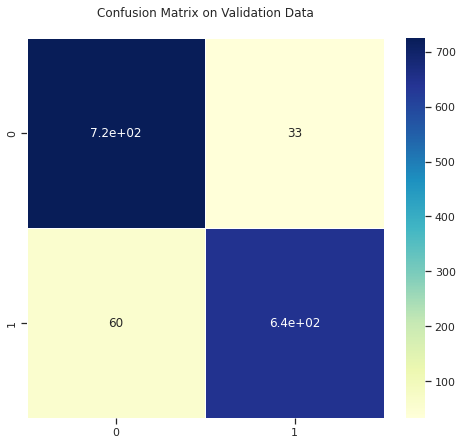

In [29]:
# Without Hyper-Parameter Tuning
logreg_pipe, scores = logreg_classifier(X_train=X_train, Y_train=y_train, X_val=X_val, Y_val=y_val, tune='n', scores=scores)

With Hyper-Parameter Tuning


Fitting 20 folds for each of 36 candidates, totalling 720 fits
Best parameters:  {'logreg__C': 0.8, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'} 

Accuracy on train set: 0.9538303693570451 

Accuracy on validation set: 0.9398496240601504 

Precision on validation set: 0.9503649635036496 

Recall on validation set: 0.9234042553191489 

F1-score on validation set: 0.9366906474820144 

Classification Report (for validation set):

               precision    recall  f1-score   support

           0       0.93      0.96      0.94       758
           1       0.95      0.92      0.94       705

    accuracy                           0.94      1463
   macro avg       0.94      0.94      0.94      1463
weighted avg       0.94      0.94      0.94      1463

Classification Report (for validation set):

               precision    recall  f1-score   support

           0       0.93      0.96      0.94       758
           1       0.95      0.92      0.94  

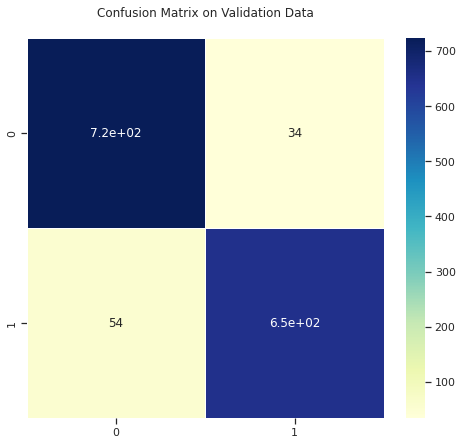

In [30]:
# With Hyper-Parameter Tuning
logreg_grid_tune, scores = logreg_classifier(X_train=X_train, Y_train=y_train, X_val=X_val, Y_val=y_val, tune='y', scores=scores)

## 3. Naive Bayes

In [31]:
def naive_bayes_classifier(X_train, Y_train, X_val, Y_val, tune, scores):
    if tune == 'n':
        print('Without Hyper-Parameter Tuning\n\n')
        gnb_pipe = Pipeline([
            ('gnb', GaussianNB())
        ])
        gnb_pipe.fit(X_train, Y_train)
        pred_train = gnb_pipe.predict(X_train)
        pred_val = gnb_pipe.predict(X_val)

        train_acc = metrics.accuracy_score(Y_train, pred_train)
        val_acc = metrics.accuracy_score(Y_val, pred_val)
        val_rec = metrics.recall_score(Y_val, pred_val)
        val_prec = metrics.precision_score(Y_val, pred_val)
        val_f1 = metrics.f1_score(Y_val, pred_val)

        gnb_acc = {
            'Model': 'Naive Bayes',
            'Accuracy': val_acc,
            'Precision': val_prec,
            'Recall': val_rec,
            'F1': val_f1
        }
        scores = scores.append(gnb_acc, ignore_index = True)
        
        print('Accuracy on train set:', train_acc,'\n')
        print('Accuracy on validation set:', val_acc, '\n')
        print('Precision on validation set:', val_prec, '\n')
        print('Recall on validation set:', val_rec, '\n')
        print('F1-score on validation set:', val_f1, '\n')
        print('Classification Report (for validation set):\n\n', classification_report(Y_val, pred_val))

        # visualize confusion matrix
        plt.subplots(figsize=(8,7))
        sns.heatmap(confusion_matrix(Y_val, pred_val), annot=True, cmap="YlGnBu", linewidths=1.0)
        plt.title('Confusion Matrix on Validation Data\n', fontsize=12)
        plt.show()

        return gnb_pipe, scores
    
    elif tune == 'y':
        print('With Hyper-Parameter Tuning\n\n')
        gnb_pipe = Pipeline([
            ('gnb', GaussianNB())
        ])
        params = {
            'gnb__var_smoothing': np.logspace(0,-13, num=100)
        }
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)
        grid = GridSearchCV(
            gnb_pipe,
            param_grid=params,
            scoring='f1_macro',
            cv=cv,
            verbose=1,
            n_jobs=-1
        )
        
        grid.fit(X_train, y_train)
        print('Best parameters: ', grid.best_params_, '\n')
        
        pred_train = grid.predict(X_train)
        pred_val = grid.predict(X_val)
        
        train_acc = metrics.accuracy_score(Y_train, pred_train)
        val_acc = metrics.accuracy_score(Y_val, pred_val)
        val_rec = metrics.recall_score(Y_val, pred_val)
        val_prec = metrics.precision_score(Y_val, pred_val)
        val_f1 = metrics.f1_score(Y_val, pred_val)

        gnb_acc = {
            'Model': 'Naive Bayes (Tuned)',
            'Accuracy': val_acc,
            'Precision': val_prec,
            'Recall': val_rec,
            'F1': val_f1
        }
        scores = scores.append(gnb_acc, ignore_index = True)
        
        print('Accuracy on train set:', train_acc, '\n')
        print('Accuracy on validation set:', val_acc, '\n')
        print('Precision on validation set:', val_prec, '\n')
        print('Recall on validation set:', val_rec, '\n')
        print('F1-score on validation set:', val_f1, '\n')
        print('Classification Report (for validation set):\n\n', classification_report(Y_val, pred_val))

        # visualize confusion matrix
        plt.subplots(figsize=(8,7))
        sns.heatmap(confusion_matrix(Y_val, pred_val), annot=True, cmap="YlGnBu", linewidths=1.0)
        plt.title('Confusion Matrix on Validation Data\n', fontsize=12)
        plt.show()
        
        return grid, scores
    
    else:
        print('Wrong Input!')


Without Hyper-Parameter Tuning


Accuracy on train set: 0.9247606019151847 

Accuracy on validation set: 0.9070403280929596 

Precision on validation set: 0.9081779053084649 

Recall on validation set: 0.8978723404255319 

F1-score on validation set: 0.9029957203994293 

Classification Report (for validation set):

               precision    recall  f1-score   support

           0       0.91      0.92      0.91       758
           1       0.91      0.90      0.90       705

    accuracy                           0.91      1463
   macro avg       0.91      0.91      0.91      1463
weighted avg       0.91      0.91      0.91      1463



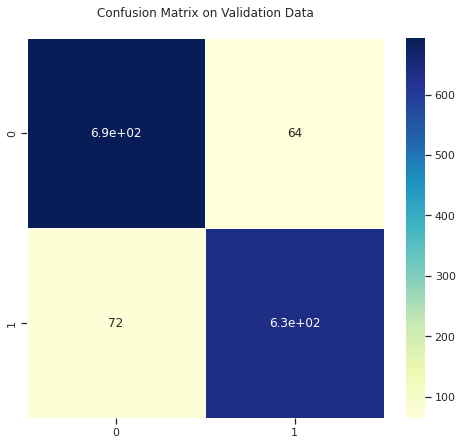

In [32]:
# Without Hyper-Parameter Tuning
gnb_pipe, scores = naive_bayes_classifier(X_train=X_train, Y_train=y_train, X_val=X_val, Y_val=y_val, tune='n', scores=scores)

With Hyper-Parameter Tuning


Fitting 50 folds for each of 100 candidates, totalling 5000 fits
Best parameters:  {'gnb__var_smoothing': 0.0002848035868435799} 

Accuracy on train set: 0.9312585499316005 

Accuracy on validation set: 0.9179767600820232 

Precision on validation set: 0.9398496240601504 

Recall on validation set: 0.8865248226950354 

F1-score on validation set: 0.9124087591240877 

Classification Report (for validation set):

               precision    recall  f1-score   support

           0       0.90      0.95      0.92       758
           1       0.94      0.89      0.91       705

    accuracy                           0.92      1463
   macro avg       0.92      0.92      0.92      1463
weighted avg       0.92      0.92      0.92      1463



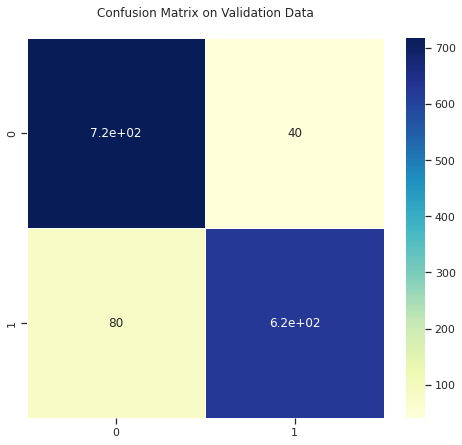

In [33]:
# With Hyper-Parameter Tuning
gnb_grid_tune, scores = naive_bayes_classifier(X_train=X_train, Y_train=y_train, X_val=X_val, Y_val=y_val, tune='y', scores=scores)

## 4. Support Vector Machine (SVM)

In [34]:
def svm_classifier(X_train, Y_train, X_val, Y_val, tune, scores):
    if tune == 'n':
        print('Without Hyper-Parameter Tuning\n\n')
        svm_pipe = Pipeline([
            ('svm', SVC())
        ])
        svm_pipe.fit(X_train, Y_train)
        pred_train = gnb_pipe.predict(X_train)
        pred_val = gnb_pipe.predict(X_val)

        train_acc = metrics.accuracy_score(Y_train, pred_train)
        val_acc = metrics.accuracy_score(Y_val, pred_val)
        val_rec = metrics.recall_score(Y_val, pred_val)
        val_prec = metrics.precision_score(Y_val, pred_val)
        val_f1 = metrics.f1_score(Y_val, pred_val)

        svm_acc = {
            'Model': 'SVM',
            'Accuracy': val_acc,
            'Precision': val_prec,
            'Recall': val_rec,
            'F1': val_f1
        }
        scores = scores.append(svm_acc, ignore_index = True)
        
        print('Accuracy on train set:', train_acc,'\n')
        print('Accuracy on validation set:', val_acc, '\n')
        print('Precision on validation set:', val_prec, '\n')
        print('Recall on validation set:', val_rec, '\n')
        print('F1-score on validation set:', val_f1, '\n')
        print('Classification Report (for validation set):\n\n', classification_report(Y_val, pred_val))

        # visualize confusion matrix
        plt.subplots(figsize=(8,7))
        sns.heatmap(confusion_matrix(Y_val, pred_val), annot=True, cmap="YlGnBu", linewidths=1.0)
        plt.title('Confusion Matrix on Validation Data\n', fontsize=12)
        plt.show()

        return svm_pipe, scores
    
    elif tune == 'y':
        print('With Hyper-Parameter Tuning\n\n')
        svm_pipe = Pipeline([
            ('svm', SVC())
        ])
        params = {
            'svm__C':[80, 85, 90],
            'svm__kernel':['linear','rbf','polynomial'],
        }
        cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
        grid = GridSearchCV(
            svm_pipe,
            param_grid=params,
            scoring='f1_macro',
            cv=cv,
            verbose=1,
            n_jobs=-1
        )
        
        grid.fit(X_train, y_train)
        print('Best parameters: ', grid.best_params_, '\n')
        
        pred_train = grid.predict(X_train)
        pred_val = grid.predict(X_val)
        
        train_acc = metrics.accuracy_score(Y_train, pred_train)
        val_acc = metrics.accuracy_score(Y_val, pred_val)
        val_rec = metrics.recall_score(Y_val, pred_val)
        val_prec = metrics.precision_score(Y_val, pred_val)
        val_f1 = metrics.f1_score(Y_val, pred_val)
        
        svm_acc = {
            'Model': 'SVM (Tuned)',
            'Accuracy': val_acc,
            'Precision': val_prec,
            'Recall': val_rec,
            'F1': val_f1
        }
        scores = scores.append(svm_acc, ignore_index = True)
        
        print('Accuracy on train set:', train_acc,'\n')
        print('Accuracy on validation set:', val_acc, '\n')
        print('Precision on validation set:', val_prec, '\n')
        print('Recall on validation set:', val_rec, '\n')
        print('F1-score on validation set:', val_f1, '\n')
        print('Classification Report (for validation set):\n\n', classification_report(Y_val, pred_val))
        
        # visualize confusion matrix
        plt.subplots(figsize=(8,7))
        sns.heatmap(confusion_matrix(Y_val, pred_val), annot=True, cmap="YlGnBu", linewidths=1.0)
        plt.title('Confusion Matrix on Validation Data\n', fontsize=12)
        plt.show()

        return grid, scores
    
    else:
        print('Wrong Input!')

Without Hyper-Parameter Tuning


Accuracy on train set: 0.9247606019151847 

Accuracy on validation set: 0.9070403280929596 

Precision on validation set: 0.9081779053084649 

Recall on validation set: 0.8978723404255319 

F1-score on validation set: 0.9029957203994293 

Classification Report (for validation set):

               precision    recall  f1-score   support

           0       0.91      0.92      0.91       758
           1       0.91      0.90      0.90       705

    accuracy                           0.91      1463
   macro avg       0.91      0.91      0.91      1463
weighted avg       0.91      0.91      0.91      1463



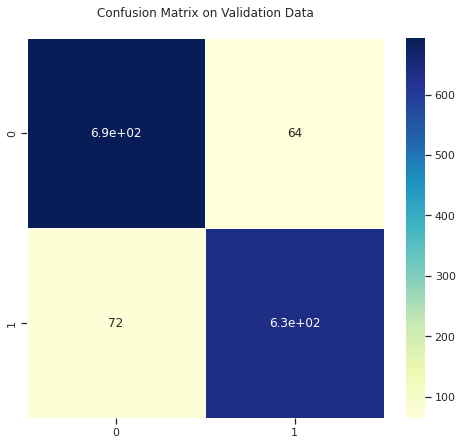

In [35]:
# Without Hyper-Parameter Tuning
svm_pipe, scores = svm_classifier(X_train=X_train, Y_train=y_train, X_val=X_val, Y_val=y_val, tune='n', scores=scores)

With Hyper-Parameter Tuning


Fitting 15 folds for each of 9 candidates, totalling 135 fits
Best parameters:  {'svm__C': 80, 'svm__kernel': 'rbf'} 

Accuracy on train set: 1.0 

Accuracy on validation set: 1.0 

Precision on validation set: 1.0 

Recall on validation set: 1.0 

F1-score on validation set: 1.0 

Classification Report (for validation set):

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       758
           1       1.00      1.00      1.00       705

    accuracy                           1.00      1463
   macro avg       1.00      1.00      1.00      1463
weighted avg       1.00      1.00      1.00      1463



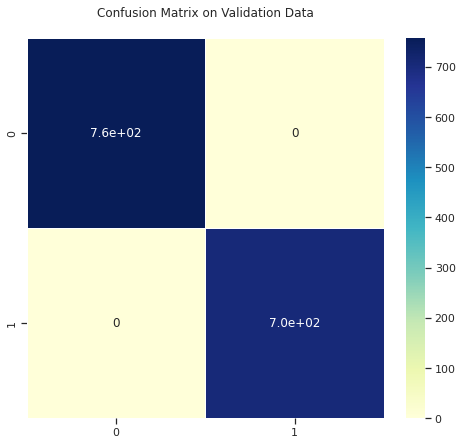

In [36]:
# With Hyper-Parameter Tuning
svm_grid_tune, scores = svm_classifier(X_train=X_train, Y_train=y_train, X_val=X_val, Y_val=y_val, tune='y', scores=scores)

# Comparative Analysis of Models

In [37]:
scores

,Model,Accuracy,Precision,Recall,F1
0,Decision Tree,0.933698,0.917582,0.947518,0.932310
1,Decision Tree (Tuned),1.000000,1.000000,1.000000,1.000000
2,Logistic Regression,0.936432,0.951327,0.914894,0.932755
3,Logistic Regression (Tuned),0.939850,0.950365,0.923404,0.936691
4,Naive Bayes,0.907040,0.908178,0.897872,0.902996
5,Naive Bayes (Tuned),0.917977,0.939850,0.886525,0.912409
6,SVM,0.907040,0.908178,0.897872,0.902996
7,SVM (Tuned),1.000000,1.000000,1.000000,1.000000


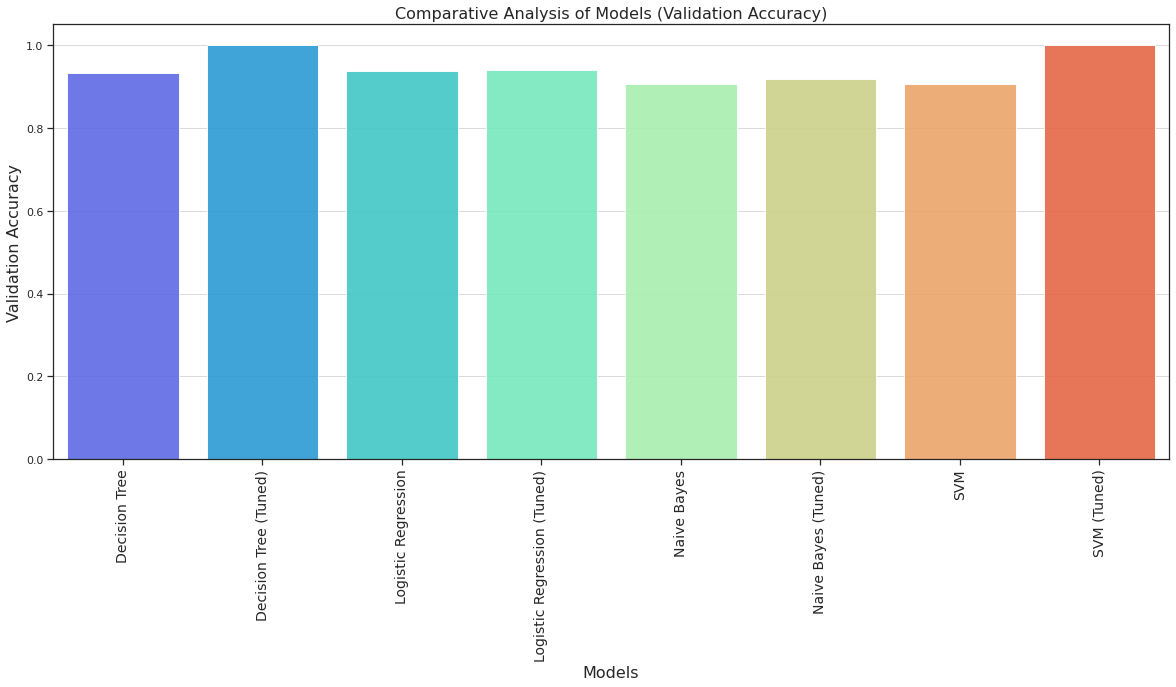

In [38]:
plt.figure(figsize=(20, 8))
plt.title('Comparative Analysis of Models (Validation Accuracy)', fontsize=16)
sns.set_style("ticks")
sns.barplot(x="Model", y="Accuracy", data=scores[['Model', 'Accuracy']], palette='rainbow', alpha = 0.9)
plt.xlabel('Models', fontsize=16)
plt.ylabel('Validation Accuracy', fontsize=16)
plt.xticks(rotation='vertical', fontsize=14)
plt.xticks(size=14)
plt.grid(axis='y', color = 'lightgray', linestyle='-', linewidth=0.8)
plt.savefig('./model_comparison', facecolor= 'w', transparent= False, bbox_inches= 'tight', dpi= 300)
plt.show()

# Predictions on Test Data

### Predicting using the tuned decision tree

In [60]:
pred_test = pd.DataFrame(dtc_grid_tune.predict(df_test))
pred_test.head()

,0
0,1
1,0
2,1
3,0
4,1


In [61]:
pred_test_1 = pred_test.replace(to_replace=0, value ='e')
pred_test_2 = pred_test_1.replace(to_replace=1, value ='p')
pred_test_2.to_csv('mushroom_tst_class_labels.csv', sep = ',', header=False, index=False)
pred_test_2.head()

,0
0,p
1,e
2,p
3,e
4,p
